# Anomaly Detection - Credit Card Fraud

### By: Scholar Sun
Given a set of credit card transactions can we detect which transaction is fraudulent?
We are presented with a anomaly detection problem.

## Initial Data Exploration

In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [3]:
# Display the dataframe
def show_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): # Displays code, with meaning cleansup try/catch
        display(df)

In [4]:
# Read and copy data
df_raw = pd.read_csv('data/creditcard.csv')
df = df_raw.copy()
show_all(df.head())
print('Datafrme dimensions: {}'.format(df.shape))

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Datafrme dimensions: (284807, 31)


In [4]:
# See overall data types
show_all(df.dtypes)

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Seems like amount and time arent scaled. We scale them and start splitting up our data frame.

In [5]:
from sklearn import preprocessing
# Scale features
df[['Amount','Time']] = preprocessing.scale(df[['Amount','Time']])

# Get positive y cases and normal cases
positive_cases_y = df.loc[df['Class'] == 1].loc[:,'Class']
normal_cases_y = df.loc[df['Class'] == 0].loc[:,'Class']

# Count positive cases and normal cases
count_positive = list(positive_cases_y).count(1)
count_normal = list(normal_cases_y).count(0)

# Yield a percentage
percentage = count_positive/(count_positive+count_normal)

# Split dataframe into positive and normal cases
df_y_good = df.loc[df['Class'] == 0].loc[:,'Class']
df_x_good = df.loc[df['Class'] == 0].drop('Class', axis=1)

df_y_anomaly = df.loc[df['Class'] == 1].loc[:,'Class']
df_x_anomaly = df.loc[df['Class'] == 1].drop('Class', axis=1)

# Splits data for full data set testing later
df_y, df_x = df['Class'], df.drop('Class', axis=1)

print("Number of positive cases: ", count_positive)
print("Percent of positive cases: ", percentage)
print("Any null entriess?: ", df.isnull().any().any())

Number of positive cases:  492
Percent of positive cases:  0.001727485630620034
Any null entriess?:  False


With most fraud detection problems, we have very few anomalous cases to work with. We also note that there are no null values.
Notice the only unanonomized features are amount and time, we see if there are any interesting properties of these two features.

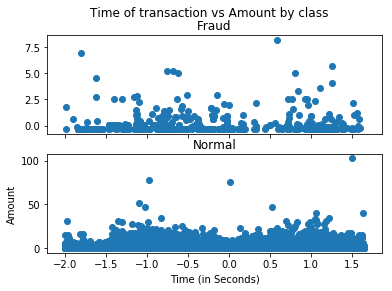

In [6]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(df_x_anomaly.Time, df_x_anomaly.Amount)
ax1.set_title('Fraud')
ax2.scatter(df_x_good.Time, df_x_good.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

So it seems like credit card fraud can happen at any time at any ammount.
Let's investigate the other features by plotting them as histograms...

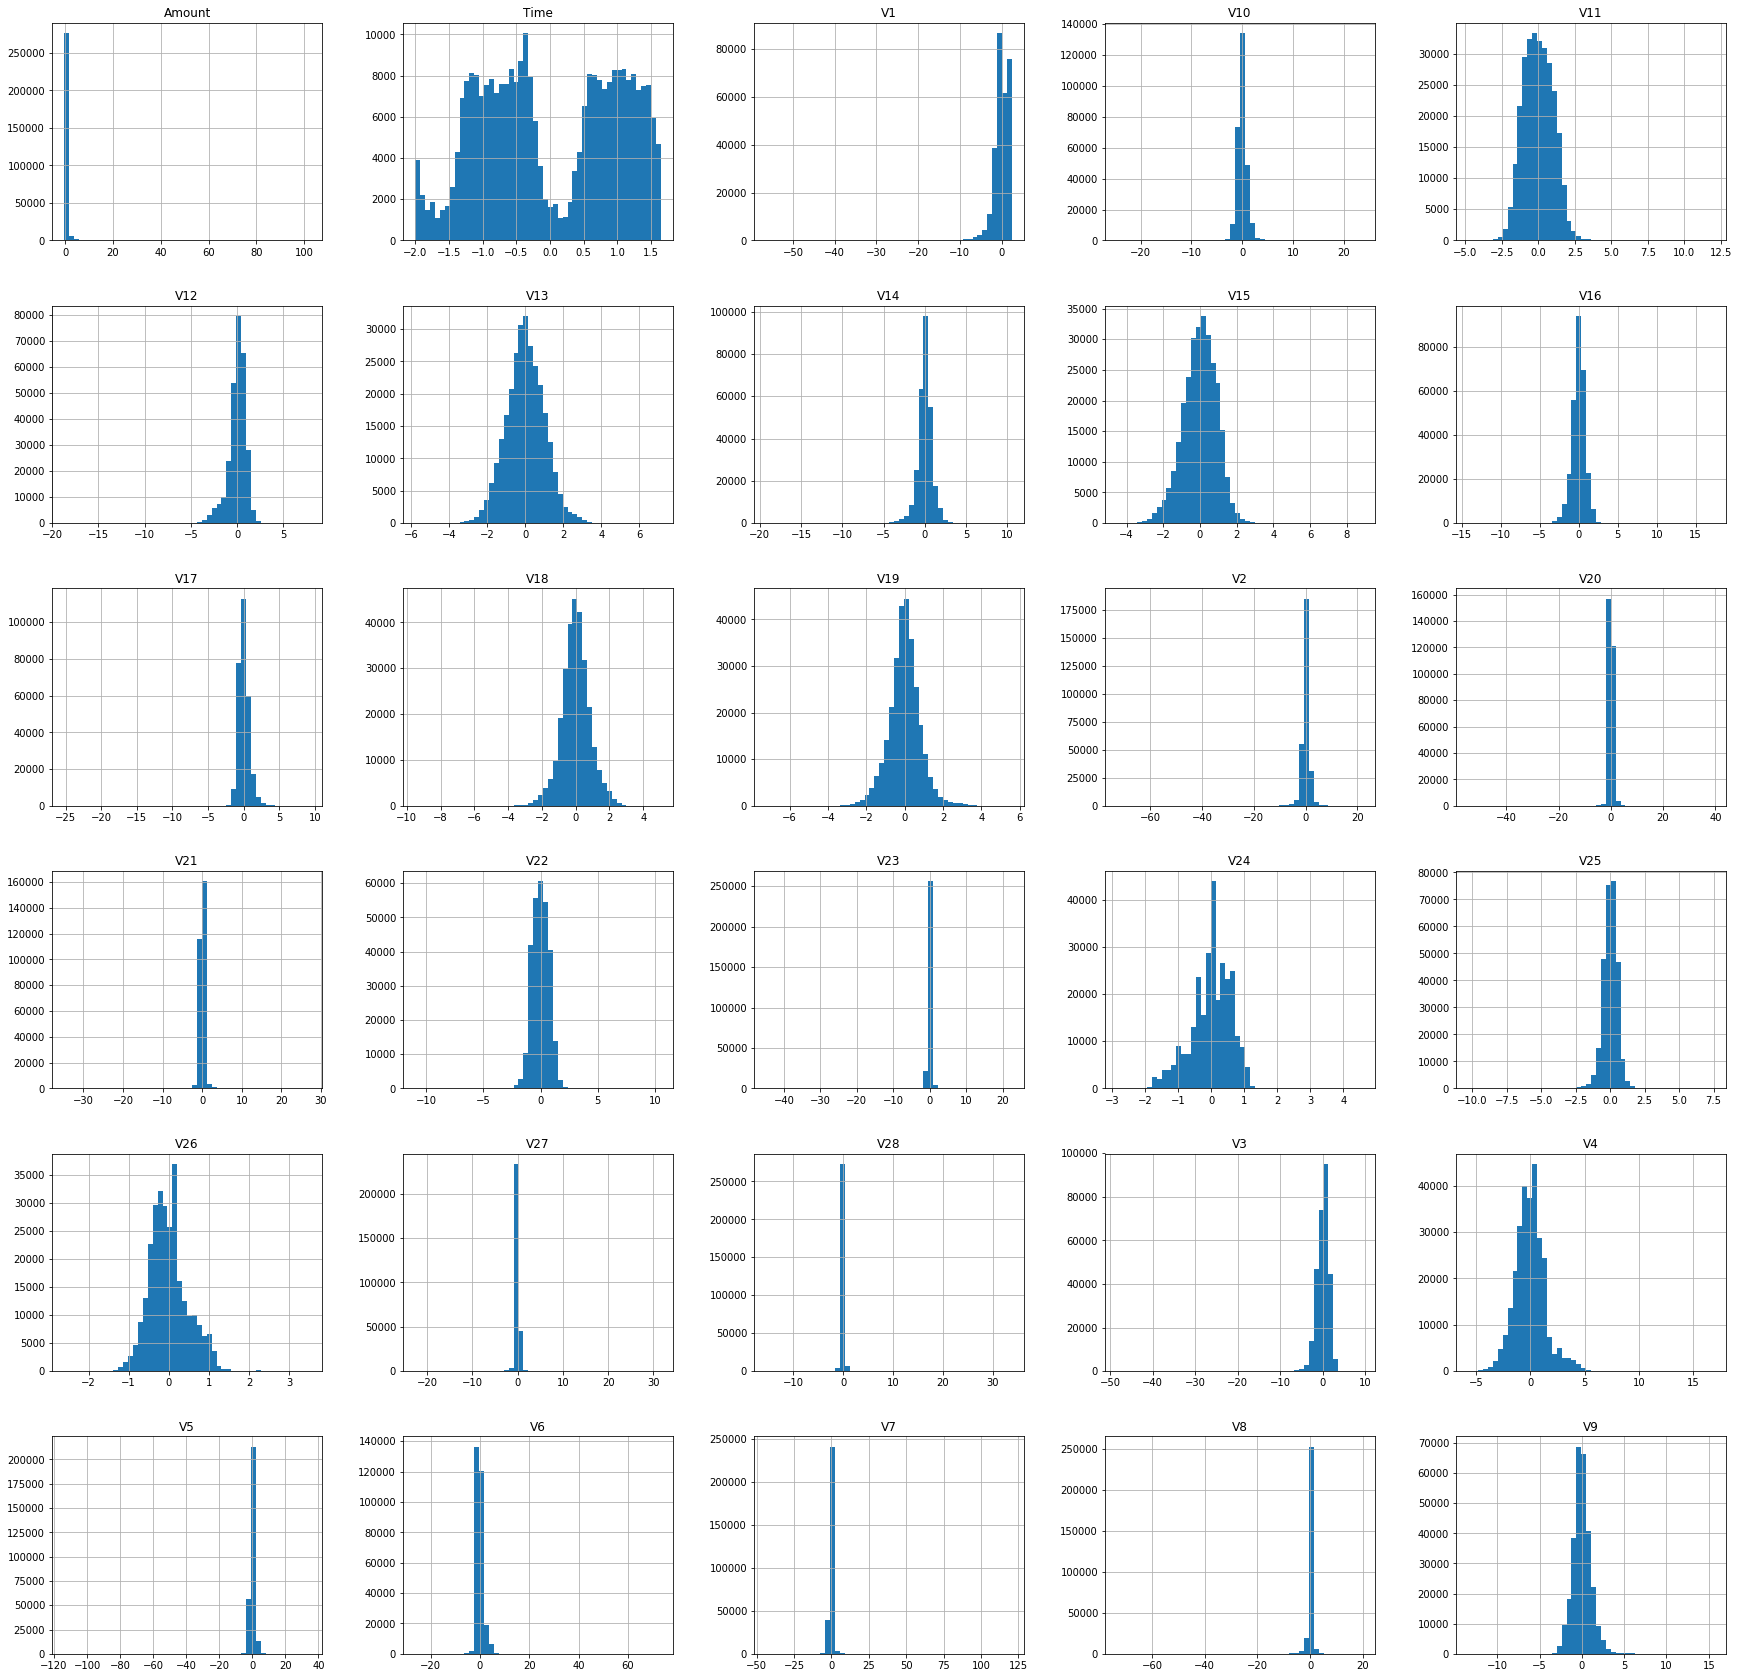

In [7]:
gauss_df = df.drop(["Class"], axis = 1)
gauss_df.hist(figsize=(30,30), bins = 50)
plt.show()

/home/scholar/CodeEnv/Anaconda3/envs/MLpy36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


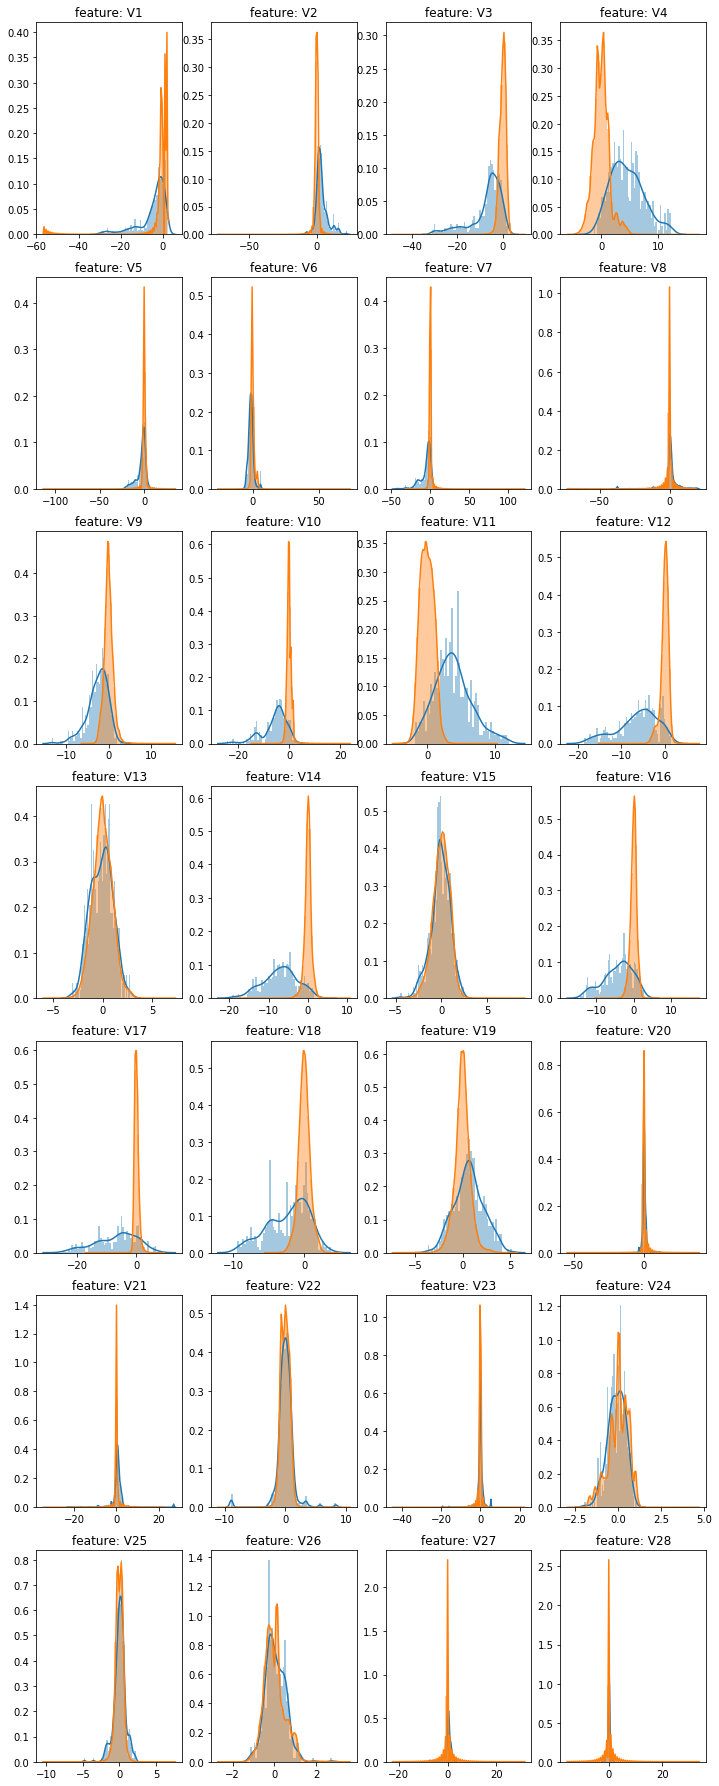

In [8]:
import matplotlib.gridspec as gridspec
v_features = df.iloc[:,1:29].columns
plt.figure(figsize=(12,8*4))
gs = gridspec.GridSpec(7, 4)
for i, cn in enumerate(gauss_df[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Class == 1], bins=50)
    sns.distplot(df[cn][df.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('feature: ' + str(cn))
plt.show()

Seems like a few of the features follow a gaussian distribution, some follow some form of distribution and a couple have stacked almost singular values. (We could use Gaussian distribution analysis, but it is "fussy", in that we have to reshape the data and choose an appropriate epsilon). However, this gaussian analysis could be done to greater effect since we know the class of each data point.

We then want to get an idea of what the data looks like in a 2D model. We perform a t-SNE transform. A t-SNE transformation is a dimension reduction transformation that is used mainly for data visualization purposes. One important note is that it does not preserve information on density. Instead, it represents a point's nearest neighbours, where points of similar nature are closer together and more different points are further. 

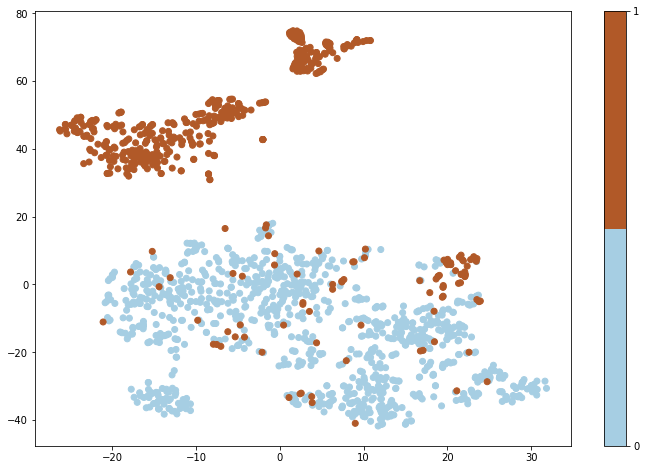

In [9]:
from sklearn.manifold import TSNE

df_plt=df[df['Class']==0].sample(1000)
df_plt_pos=df[df['Class']==1].sample(492)
df_plt=pd.concat([df_plt,df_plt_pos])
y_plt=df_plt['Class']
X_plt=df_plt.drop('Class',1)

X_embedded = TSNE(n_components=2, perplexity = 50).fit_transform(X_plt)

plt.figure(figsize=(12,8))
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=y_plt, cmap=plt.cm.get_cmap("Paired", 2))
plt.colorbar(ticks=range(2))

Seems like t-SNE already did a pretty good job clustering groups of outliers. There are some sprinkling of outliers within the normal cases however, but with some manipulation we can counteract this. This is promising.

## Model Selection

Key points:

- Skewed data set where we have very few anomolous cases. 
- t-SNE clusters pretty decently
- PCA transformed so we perform minimal feature engineering. (We can try removing unimportant features and consolidate correlated features)

We first try isolation forests. 

Isolation forest is a form of unsupervised outlier detection that boasts great results on large, higher-dimension data sets. Seems promising so I want to try that first. If it turns out poorly, we can test other models. Runs great with minimal feature engineering.

### Isolation Forest

For our test and training split, I opted for a stratified shuffle, which preservers the percentages of outliers in both training and test sets.

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=1)

for train_index, test_index in sss.split(df_x, df_y):
    print("Train:", train_index, "Test:", test_index)
    X_train, X_valid = df_x.iloc[train_index], df_x.iloc[test_index]
    y_train, y_valid = df_y.iloc[train_index], df_y.iloc[test_index]


Train: [  9341 210529  51525 ... 224660 206178  99525] Test: [ 32255 171386 198944 ... 138758 212696 203581]
Train: [ 10301  84176    390 ...  13070 138218 148701] Test: [180911  84197 166643 ...  70732 169252 150551]
Train: [ 85107 252882  60427 ... 258430  26954  34834] Test: [195123 215525  81858 ... 248741  73553 173385]
Train: [ 47477 173926 233851 ... 106865 184772 135086] Test: [137109 254383 233197 ... 129490 157294 200980]
Train: [260386  93305 221277 ...  77793  80098  33334] Test: [103563 246055 269160 ... 134382 258788  88740]


In [11]:
from sklearn.ensemble import IsolationForest
isfo = IsolationForest(contamination = percentage, bootstrap = True, n_jobs = -1,n_estimators = 300, max_samples = 2048)
isfo.fit(X_train)

/home/scholar/CodeEnv/Anaconda3/envs/MLpy36/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IsolationForest(behaviour='old', bootstrap=True,
        contamination=0.001727485630620034, max_features=1.0,
        max_samples=2048, n_estimators=300, n_jobs=-1, random_state=None,
        verbose=0)

In [12]:
def updateY(y):
    y[y == 1] = 0
    y[y == -1] = 1
    return y

y_test_pred = isfo.predict(X_valid)
y_train_pred = isfo.predict(X_train)

y_test_pred=updateY(y_test_pred)
y_train_pred=updateY(y_train_pred)

/home/scholar/CodeEnv/Anaconda3/envs/MLpy36/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
/home/scholar/CodeEnv/Anaconda3/envs/MLpy36/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [13]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

def evaluate(predicted, actual):
    c_m = confusion_matrix(predicted, actual)
    false_positive = c_m[0][1]
    true_positive = c_m[1][1]
    print("Accuracy: ", accuracy_score(predicted, actual))
    print("Confusion Matrix: ", c_m)
    print("F1: ", f1_score(predicted, actual))
    print("False positive rate: ", false_positive/(false_positive+true_positive))
    print()
    
print("TRAIN")
evaluate(y_train_pred, y_train)
print("TEST")
evaluate(y_test_pred, y_valid)


TRAIN
Accuracy:  0.997586078254954
Confusion Matrix:  [[227176    275]
 [   275    119]]
F1:  0.3020304568527919
False positive rate:  0.6979695431472082

TEST
Accuracy:  0.9976299989466662
Confusion Matrix:  [[56797    68]
 [   67    30]]
F1:  0.3076923076923077
False positive rate:  0.6938775510204082



After some hyperparameter tuning, I have arrived at the optimal parameters. Selecting 2024 random samples, with replacement.

Seems okay for a pretty basic model, with minimal feature engineering. However I am not satisifed with a ~32% fraud detection rate. I investigate further why my model is underperforming and consider using other models.

I try removing unimportant features, which can yield inaccuracies when scoring outliers due to similar path lengths between normal and positive data points.

In [14]:
def rmse(x,y): 
    return np.sqrt(np.mean(((x-y)**2)))

def print_score(m):
    scores = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    
    for t, s in zip(['Train RMSE: ', 'Valid RMSE', 'Train R^2', 'Valid R^2'], scores):
        print(f'{t}: {s}')
        
    if hasattr(m, 'oob_score_'): 
        print(f'OOB Score: {m.oob_score_}')

In [33]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=30, 
                              n_jobs=-1,
                              oob_score=True)

model.fit(X_train, y_train)

/home/scholar/CodeEnv/Anaconda3/envs/MLpy36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [34]:
print_score(model)

Train RMSE: : 0.008177588107269332
Valid RMSE: 0.02054350853985264
Train R^2: 0.9612612684038728
Valid R^2: 0.7542711144671712
OOB Score: 0.7192913548006488


In [35]:
def updateYForest(y):
    y[y > 0.5] = 1
    y[y <= 0.5] = 0
    return y
pred = updateYForest(model.predict(X_valid))
evaluate(pred, y_valid)

Accuracy:  0.9996137776061234
Confusion Matrix:  [[56860    18]
 [    4    80]]
F1:  0.8791208791208791
False positive rate:  0.1836734693877551



Out of curiosity, I train and score a Random forest and it performs miles better than the anomaly detection algorithm. We try some supervised learning algorithms later in the notebook, after we try to optimize our isolation forest.

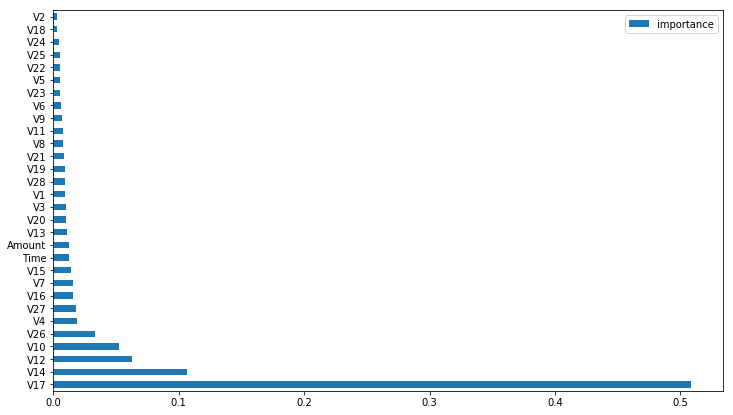

In [18]:
fi = pd.DataFrame(model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
fi[:30].plot.barh(figsize=(12, 7))

In [19]:
X_train_old, X_valid_old = X_train.copy(), X_valid.copy()
X_train, X_valid = X_train[fi[fi['importance'] > 0.02].index], X_valid[fi[fi['importance'] > 0.02].index]
print(X_train.shape)

(227845, 5)


In [20]:
isfo.fit(X_train)
new_fi_pred = isfo.predict(X_valid)
new_fi_pred = updateY(new_fi_pred)
new_fi_pred2 = isfo.predict(X_train)
new_fi_pred2 = updateY(new_fi_pred2)
evaluate(new_fi_pred,y_valid)
evaluate(new_fi_pred2,y_train)

/home/scholar/CodeEnv/Anaconda3/envs/MLpy36/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/home/scholar/CodeEnv/Anaconda3/envs/MLpy36/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
/home/scholar/CodeEnv/Anaconda3/envs/MLpy36/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


Accuracy:  0.9987008883115059
Confusion Matrix:  [[56822    32]
 [   42    66]]
F1:  0.6407766990291262
False positive rate:  0.32653061224489793

Accuracy:  0.9986833154117931
Confusion Matrix:  [[227301    150]
 [   150    244]]
F1:  0.6192893401015228
False positive rate:  0.38071065989847713



0.65 F1 score and 33% false positive rate was quite the improvement. I'm not sure what other techniques I can use to enhance the difference between outlier and normal case path lengths. I'm pretty happy with the result, as it was a quick and dirty way to classify the outliers with very minimal data manipulation.
However, we can use the fact that the data is labelled to our advantage.

For future implementations, we can try a Low Pass Filter (Gaussian analysis).